Removing patches that contain certain % of background (white pixels).

In [4]:
#!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 MB 7.0 MB/s eta 0:00:0000:0100:01


In [2]:
import tifffile
from skimage import io
from PIL import Image
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, img_as_float
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2


C:\Users\Zosia\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


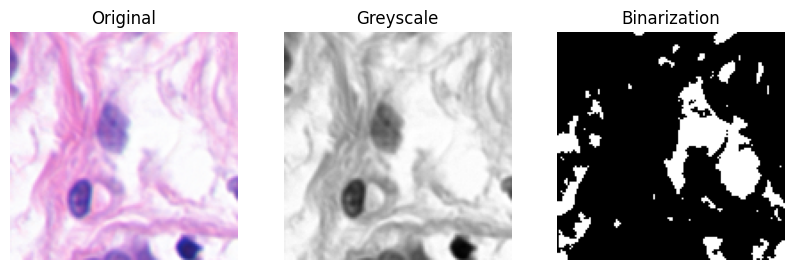

White percentage: 13.93%


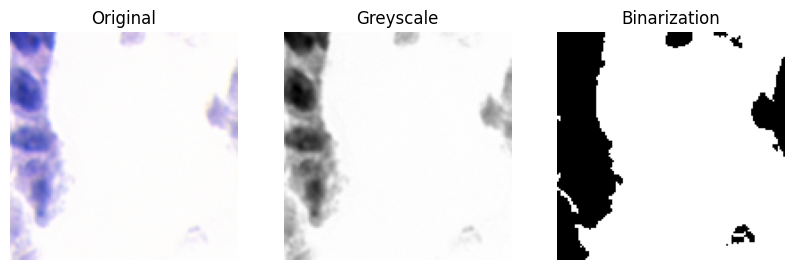

White percentage: 75.10%


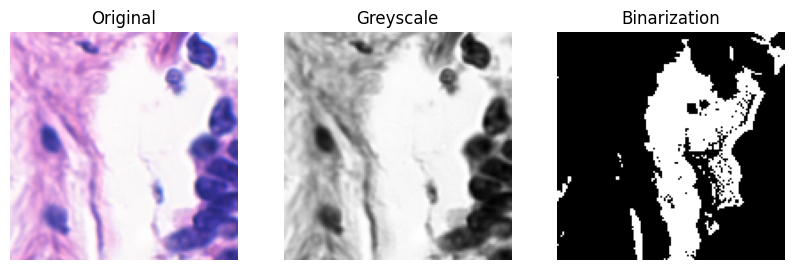

White percentage: 24.30%


In [3]:
def whitePercentage(obrazek):
    img = io.imread(obrazek)
    imgBW = cv2.imread(obrazek, cv2.IMREAD_GRAYSCALE)

    ret, thresh = cv2.threshold(imgBW, 245, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # percentage of white
    white_area = sum(cv2.contourArea(cnt) for cnt in contours)
    total_area = imgBW.shape[0] * imgBW.shape[1]
    percent_white = (white_area / total_area) * 100

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Greyscale")
    plt.imshow(imgBW, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Binarization")
    plt.imshow(thresh, cmap='gray')
    plt.axis('off')

    plt.show()

    return percent_white


# Przykładowe użycie
imagePath = "Patches_Data_Correct/ytma10_010704_benign1_ccd/0_0.png"
imagePath2 = "Patches_Data_Correct/ytma49_111303_malignant1_ccd/5_5.png"
imagePath3 = "Patches_Data_Correct/ytma23_022103_benign2_ccd/2_3.png"


percent_white = whitePercentage(imagePath)
print(f"White percentage: {percent_white:.2f}%")

percent_white = whitePercentage(imagePath2)
print(f"White percentage: {percent_white:.2f}%")

percent_white = whitePercentage(imagePath3)
print(f"White percentage: {percent_white:.2f}%")

In [13]:
def countWhitePercentage(obrazek):
    img = io.imread(imagePath)
    imgBW = cv2.imread(obrazek, cv2.IMREAD_GRAYSCALE)

    ret, thresh = cv2.threshold(imgBW, 245, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # percentage of white
    white_area = sum(cv2.contourArea(cnt) for cnt in contours)
    total_area = imgBW.shape[0] * imgBW.shape[1]
    percent_white = (white_area / total_area) * 100

    return percent_white

In [18]:
import os
import shutil


def process_patches(base_dir, output_dir):
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            file_path = os.path.join(root, file)
            percent_white = countWhitePercentage(file_path)

            relative_path = os.path.relpath(root, base_dir)
            target_dir = os.path.join(output_dir, "Background" if percent_white > 70 else "NotBackground", relative_path)

            os.makedirs(target_dir, exist_ok=True)

            shutil.copy(file_path, target_dir)


# Definiowanie ścieżek
base_dir = 'Patches_Data_Correct'
output_dir = 'PatchesBackground'

# Przetwarzanie patchy
process_patches(base_dir, output_dir)
